# B

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_df = pd.read_csv('mnist_train.csv')

train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('mnist_test.csv')

test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\lskel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


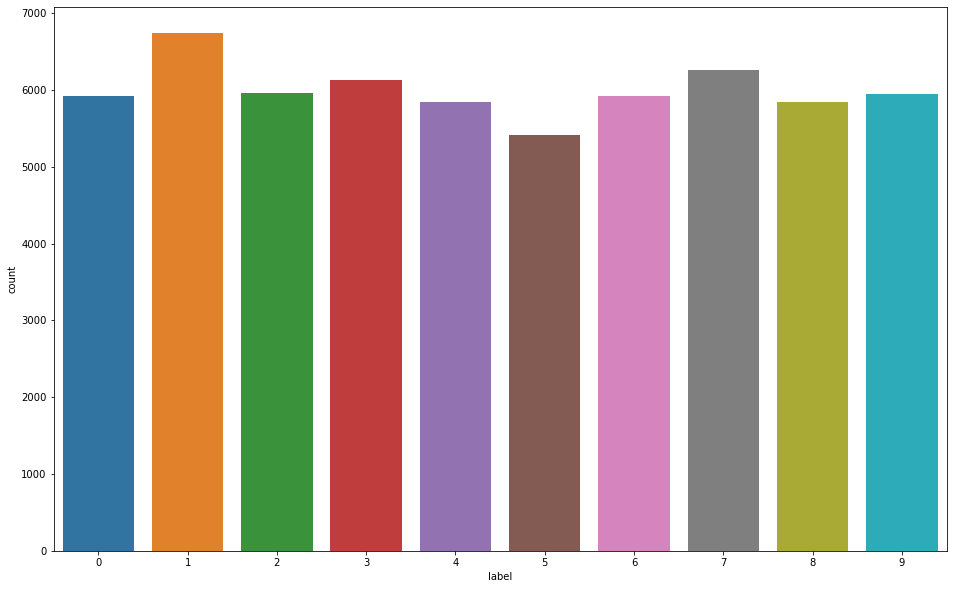

In [4]:
plt.figure(figsize=(16, 10))
sns.countplot(train_df['label'])
plt.show()

In [5]:
# Divinding input and output. Two objective - 1) preparation for standardization: float32, 2) input data is divided into 784 chunks.
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 1)
(10000, 784) (10000, 1)


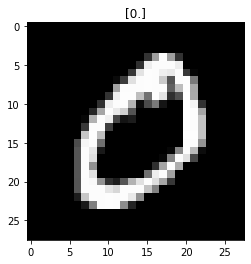

In [6]:
# see an
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

In [7]:
#one-hot encoding to make the same data structure
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(60000, 10)


In [8]:
# standardizing your input data. Image data consist of unsigned integer 8bit ranging from 0 to 255. Thus, you can standardize the format by changing to floating point 32bit. 
x_train = x_train / 255.
x_test = x_test / 255.

In [9]:
#Network format
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(10, activation='sigmoid')(hidden)

model = Model(inputs=input, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


C:\Users\lskel\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
history = model.fit(
    x_train,
    y_train,
    # If you put validation data at here, your model will compare the output 
    # with the validation data per each iteration. 
    validation_data=(x_test, y_test), 
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1903 - acc: 0.9430 - val_loss: 0.1075 - val_acc: 0.9667
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0916 - acc: 0.9719 - val_loss: 0.0969 - val_acc: 0.9708
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0904 - val_acc: 0.9729
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0514 - acc: 0.9844 - val_loss: 0.0857 - val_acc: 0.9765
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0406 - acc: 0.9876 - val_loss: 0.0878 - val_acc: 0.9780
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334 - acc: 0.9898 - val_loss: 0.0907 - val_acc: 0.9782
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - acc: 0.9907 - val_loss: 0.0919 - val_acc: 0.9782
Epoch 8/20
1875/1875 [==============================] - 8s 4ms

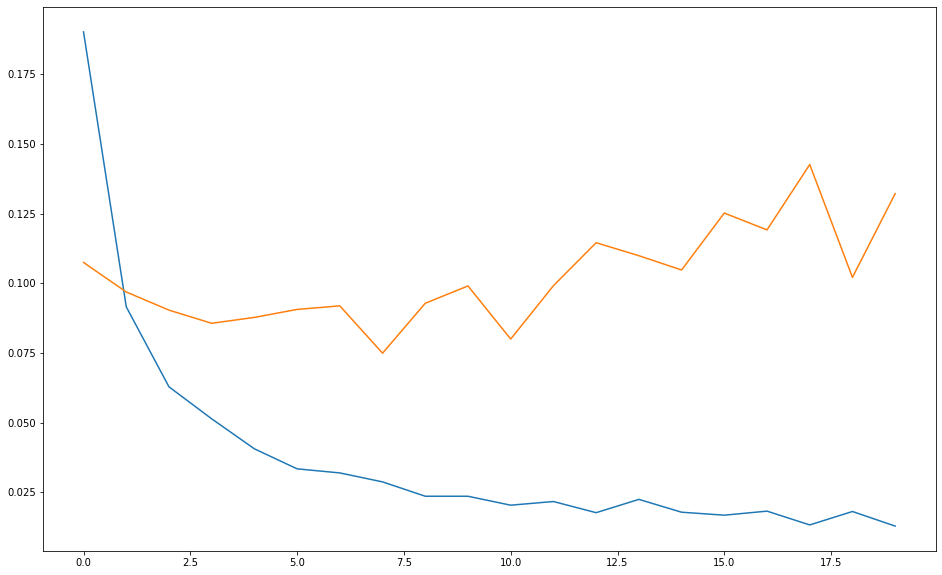

In [11]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


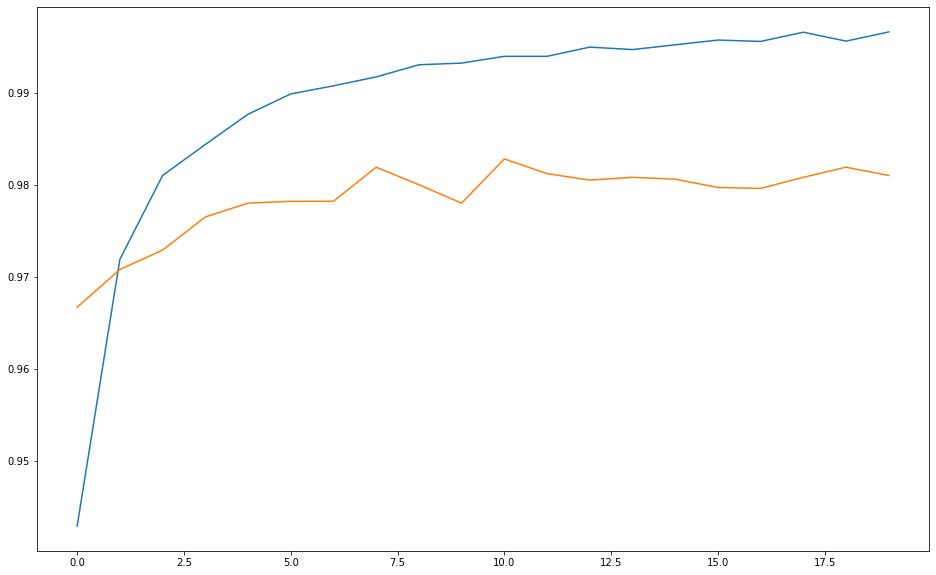

In [12]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])